In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score

In [36]:
df=pd.read_csv("cleaned_titanic.csv")

In [37]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [38]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [39]:
X=df.drop("Survived",axis=1)
y=df["Survived"]

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [42]:
svm_model=SVC(kernel="rbf",C=1,gamma="scale")
svm_model.fit(X_train,y_train)

,C,1
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [43]:
y_pred=svm_model.predict(X_test)

In [44]:
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.8212290502793296


In [45]:
cm=confusion_matrix(y_test,y_pred)

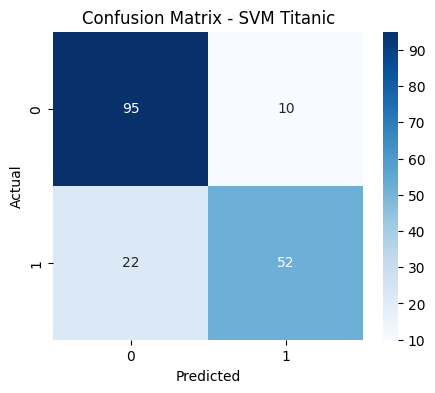

In [46]:
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM Titanic")
plt.show()

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.86       105
           1       0.84      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



In [48]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

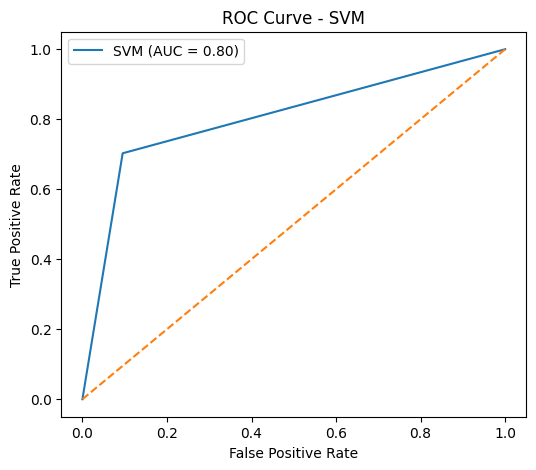

In [49]:
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"SVM (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.show()

In [50]:
df1=pd.read_csv("diabetes.csv")

In [51]:
df1.head()

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0,720.0
1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0,360.0
2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185.0,92.0,49.0,57.0,180.0
3,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,NaN,NaN,33.0,38.0,480.0
4,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,NaN,NaN,44.0,41.0,300.0


In [52]:
df1.isna().sum()

id            0
chol          1
stab.glu      0
hdl           1
ratio         1
glyhb        13
location      0
age           0
gender        0
height        5
weight        1
frame        12
bp.1s         5
bp.1d         5
bp.2s       262
bp.2d       262
waist         2
hip           2
time.ppn      3
dtype: int64

In [53]:
df1.shape

(403, 19)

In [54]:
df1.drop("bp.2s",axis=1,inplace=True)

In [55]:
df1.drop("bp.2d",axis=1,inplace=True)

In [56]:
df1.head()

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip,time.ppn
0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,29.0,38.0,720.0
1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,46.0,48.0,360.0
2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,49.0,57.0,180.0
3,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,33.0,38.0,480.0
4,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,44.0,41.0,300.0


In [57]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        403 non-null    int64  
 1   chol      402 non-null    float64
 2   stab.glu  403 non-null    int64  
 3   hdl       402 non-null    float64
 4   ratio     402 non-null    float64
 5   glyhb     390 non-null    float64
 6   location  403 non-null    object 
 7   age       403 non-null    int64  
 8   gender    403 non-null    object 
 9   height    398 non-null    float64
 10  weight    402 non-null    float64
 11  frame     391 non-null    object 
 12  bp.1s     398 non-null    float64
 13  bp.1d     398 non-null    float64
 14  waist     401 non-null    float64
 15  hip       401 non-null    float64
 16  time.ppn  400 non-null    float64
dtypes: float64(11), int64(3), object(3)
memory usage: 53.7+ KB


In [58]:
df1.isna().sum()

id           0
chol         1
stab.glu     0
hdl          1
ratio        1
glyhb       13
location     0
age          0
gender       0
height       5
weight       1
frame       12
bp.1s        5
bp.1d        5
waist        2
hip          2
time.ppn     3
dtype: int64

In [59]:
df1.loc[df1["chol"].isna(),"chol"]=df1["chol"].mean()

In [60]:
df1.columns

Index(['id', 'chol', 'stab.glu', 'hdl', 'ratio', 'glyhb', 'location', 'age',
       'gender', 'height', 'weight', 'frame', 'bp.1s', 'bp.1d', 'waist', 'hip',
       'time.ppn'],
      dtype='object')

In [78]:
df1.loc[df1["hdl"].isna(),"hdl"]=df1["hdl"].mean()
df1.loc[df1["ratio"].isna(),"ratio"]=df1["ratio"].mean()
df1.loc[df1["glyhb"].isna(),"glyhb"]=df1["glyhb"].mean()
df1.loc[df1["height"].isna(),"height"]=df1["height"].mean()
df1.loc[df1["weight"].isna(),"weight"]=df1["weight"].mean()
df1.loc[df1["frame"].isna(),"frame"]=df1["frame"].mode()[0]
df1.loc[df1["bp.1s"].isna(),"bp.1s"]=df1["bp.1s"].mean()
df1.loc[df1["bp.1d"].isna(),"bp.1d"]=df1["bp.1d"].mean()
df1.loc[df1["waist"].isna(),"waist"]=df1["waist"].mean()
df1.loc[df1["hip"].isna(),"hip"]=df1["hip"].mean()
df1.loc[df1["time.ppn"].isna(),"time.ppn"]=df1["time.ppn"].mean()

In [79]:
df1["glyhb"].unique()

array([ 4.30999994,  4.44000006,  4.63999987,  4.63000011,  7.71999979,
        4.80999994,  4.84000015,  3.94000006,  5.78000021,  4.76999998,
        4.96999979,  4.46999979,  4.59000015,  4.67000008,  3.41000009,
        4.32999992,  4.53000021,  5.28000021, 11.23999977,  6.48999977,
       12.73999977,  5.55999994,  4.61000013,  4.17999983,  5.0999999 ,
        4.28000021,  4.51999998,  4.36999989,  5.11000013, 15.52000046,
        5.65999985,  3.67000008,  4.03000021,  2.68000007,  3.55999994,
        6.21000004,  7.90999985,  4.57999992,  3.8900001 ,  4.38000011,
        5.58976924,  5.96000004,  4.40999985,  6.13999987, 10.89999962,
        5.57000017,  4.25      ,  5.3499999 ,  6.32999992,  4.55999994,
        9.39000034,  6.3499999 ,  5.19999981,  4.98000002, 13.69999981,
       10.93000031,  5.23000002, 14.31000042,  3.99000001,  4.26999998,
       11.40999985,  8.39999962,  4.38999987,  6.11000013,  7.44000006,
        5.46999979,  4.28999996,  3.93000007,  6.96000004,  5.17

In [80]:
df1["diabetes"]=df1["glyhb"]>=6.5

In [81]:
df1.describe()

,id,chol,stab.glu,hdl,ratio,glyhb,age,gender,height,weight,bp.1s,bp.1d,waist,hip,time.ppn
count,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.00000,403.000000,403.000000,403.000000,403.000000,403.000000
mean,15978.310174,207.845771,106.672457,50.445274,4.521642,5.589769,46.851117,0.580645,66.020101,177.59204,136.904523,83.321608,37.900249,43.039900,341.250000
std,11881.122124,44.390242,53.076655,17.241141,1.725736,2.206036,16.312333,0.494067,3.894070,40.29046,22.599166,13.504452,5.715043,5.642624,308.383786
min,1000.000000,78.000000,48.000000,12.000000,1.500000,2.680000,19.000000,0.000000,52.000000,99.00000,90.000000,48.000000,26.000000,30.000000,5.000000
25%,4792.500000,179.000000,81.000000,38.000000,3.200000,4.390000,34.000000,0.000000,63.000000,151.00000,122.000000,75.000000,33.000000,39.000000,97.500000
50%,15766.000000,204.000000,89.000000,46.000000,4.200000,4.870000,45.000000,1.000000,66.000000,173.00000,136.000000,82.000000,37.000000,42.000000,240.000000
75%,20336.000000,230.000000,106.000000,59.000000,5.400000,5.589769,60.000000,1.000000,69.000000,200.00000,146.000000,90.000000,41.000000,46.000000,495.000000
max,41756.000000,443.000000,385.000000,120.000000,19.299999,16.110001,92.000000,1.000000,76.000000,325.00000,250.000000,124.000000,56.000000,64.000000,1560.000000


In [82]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        403 non-null    int64  
 1   chol      403 non-null    float64
 2   stab.glu  403 non-null    int64  
 3   hdl       403 non-null    float64
 4   ratio     403 non-null    float64
 5   glyhb     403 non-null    float64
 6   location  403 non-null    object 
 7   age       403 non-null    int64  
 8   gender    403 non-null    int64  
 9   height    403 non-null    float64
 10  weight    403 non-null    float64
 11  frame     403 non-null    object 
 12  bp.1s     403 non-null    float64
 13  bp.1d     403 non-null    float64
 14  waist     403 non-null    float64
 15  hip       403 non-null    float64
 16  time.ppn  403 non-null    float64
 17  diabetes  403 non-null    bool   
dtypes: bool(1), float64(11), int64(4), object(2)
memory usage: 54.0+ KB


In [83]:
df1["diabetes"]=df1["diabetes"].astype(int)

In [84]:
df1.head()

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip,time.ppn,diabetes
0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,1,62.0,121.0,medium,118.0,59.0,29.0,38.0,720.0,0
1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,1,64.0,218.0,large,112.0,68.0,46.0,48.0,360.0,0
2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,1,61.0,256.0,large,190.0,92.0,49.0,57.0,180.0,0
3,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,0,67.0,119.0,large,110.0,50.0,33.0,38.0,480.0,0
4,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,0,68.0,183.0,medium,138.0,80.0,44.0,41.0,300.0,1


In [85]:
df1.columns

Index(['id', 'chol', 'stab.glu', 'hdl', 'ratio', 'glyhb', 'location', 'age',
       'gender', 'height', 'weight', 'frame', 'bp.1s', 'bp.1d', 'waist', 'hip',
       'time.ppn', 'diabetes'],
      dtype='object')

In [86]:
df1["gender"]=df1["gender"].map({"male":0,"female":1})

In [87]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        403 non-null    int64  
 1   chol      403 non-null    float64
 2   stab.glu  403 non-null    int64  
 3   hdl       403 non-null    float64
 4   ratio     403 non-null    float64
 5   glyhb     403 non-null    float64
 6   location  403 non-null    object 
 7   age       403 non-null    int64  
 8   gender    0 non-null      float64
 9   height    403 non-null    float64
 10  weight    403 non-null    float64
 11  frame     403 non-null    object 
 12  bp.1s     403 non-null    float64
 13  bp.1d     403 non-null    float64
 14  waist     403 non-null    float64
 15  hip       403 non-null    float64
 16  time.ppn  403 non-null    float64
 17  diabetes  403 non-null    int64  
dtypes: float64(12), int64(4), object(2)
memory usage: 56.8+ KB


In [88]:
df1["frame"].unique()

array(['medium', 'large', 'small'], dtype=object)

In [89]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        403 non-null    int64  
 1   chol      403 non-null    float64
 2   stab.glu  403 non-null    int64  
 3   hdl       403 non-null    float64
 4   ratio     403 non-null    float64
 5   glyhb     403 non-null    float64
 6   location  403 non-null    object 
 7   age       403 non-null    int64  
 8   gender    0 non-null      float64
 9   height    403 non-null    float64
 10  weight    403 non-null    float64
 11  frame     403 non-null    object 
 12  bp.1s     403 non-null    float64
 13  bp.1d     403 non-null    float64
 14  waist     403 non-null    float64
 15  hip       403 non-null    float64
 16  time.ppn  403 non-null    float64
 17  diabetes  403 non-null    int64  
dtypes: float64(12), int64(4), object(2)
memory usage: 56.8+ KB


In [90]:
df1.isna().sum()

id            0
chol          0
stab.glu      0
hdl           0
ratio         0
glyhb         0
location      0
age           0
gender      403
height        0
weight        0
frame         0
bp.1s         0
bp.1d         0
waist         0
hip           0
time.ppn      0
diabetes      0
dtype: int64